# Sales Analysis

#### Import necessary libraries

In [1]:
import os
import pandas

#### Merge Data From Each Month Into One CSV

In [2]:
data = pandas.read_csv('../Sales_Data/Sales_April_2019.csv')
# data.head()

files = os.listdir('../Sales_Data/')

all_months_data = pandas.DataFrame()

for file in files:
    df = pandas.read_csv(f"../Sales_Data/{file}")
    all_months_data = pandas.concat([all_months_data, df])

all_months_data.to_csv("../data/all_data.csv", index=False)

#### Read CSV Files

In [2]:
all_data = pandas.read_csv('../data/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Best Month For Sales

Add Month Column

In [4]:
all_data["Month"] = all_data["Order Date"].str[0:2] # set month column with Order Date 2 word for column
all_data["Month"] = all_data["Month"].astype('int32') # set month column into integer
all_data.head()

ValueError: cannot convert float NaN to integer

Drop rows of NAN

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how='all') # 186305 
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


##### Find 'OR' And Delete It

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

##### Reset Index

In [ ]:
all_data.reset_index(drop=True, inplace=True)

##### Convert Column To The Correct Type

In [ ]:
all_data["Quantity Ordered"] = pandas.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pandas.to_numeric(all_data["Price Each"])

C:\Users\User\AppData\Local\Temp\ipykernel_7520\3345049663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Quantity Ordered"] = pandas.to_numeric(all_data["Quantity Ordered"])
C:\Users\User\AppData\Local\Temp\ipykernel_7520\3345049663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Price Each"] = pandas.to_numeric(all_data["Price Each"])


In [ ]:
pandas.DataFrame(all_data.loc[517]).transpose()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
517,177055,Lightning Charging Cable,1,14.95,04/09/19 12:37,"59 Forest St, Atlanta, GA 30301",04


##### Add Sales Column

In [ ]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_7520\3798608901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04,11.95
6,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04,99.99
7,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04,11.95
8,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04,1700.00
9,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04,11.99


##### Best Month Of Sales

In [ ]:
results = all_data.groupby('Month').sum()
# pandas.DataFrame(all_data[all_data["Month"] == 3].sum()).transpose()
pandas.DataFrame(results["Sales"].head())

,Sales
Month,
01,1822256.73
02,2202022.42
03,2807100.38
04,3390670.24
05,3152606.75


Text(0.5, 0, 'Month Number')

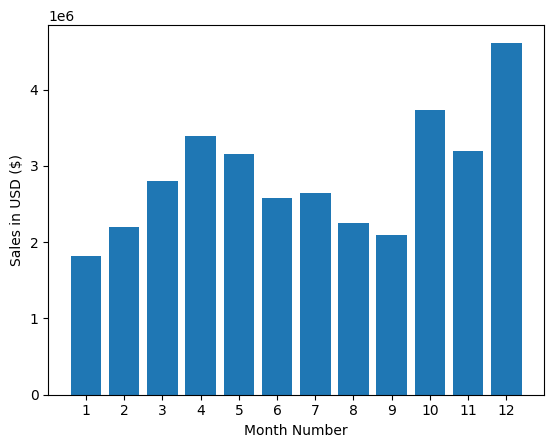

In [ ]:
import matplotlib.pyplot as pylot

months = range(1, 13)

pylot.bar(months, results["Sales"])
pylot.xticks(months)
pylot.ylabel('Sales in USD ($)')
pylot.xlabel('Month Number')
# pylot.show()

##### Add City Column

In [ ]:
def getCity(address):
    return address.split(',')[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{getCity(x)} ({x.split(',')[2].split(' ')[1]})")

all_data

C:\Users\User\AppData\Local\Temp\ipykernel_7520\3168434397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{getCity(x)} ({x.split(',')[2].split(' ')[1]})")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.97,Los Angeles (CA)
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.00,San Francisco (CA)
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.00,San Francisco (CA)
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.99,San Francisco (CA)


##### Highest Number Of Sales in City

In [ ]:
results = all_data.groupby("City").sum()

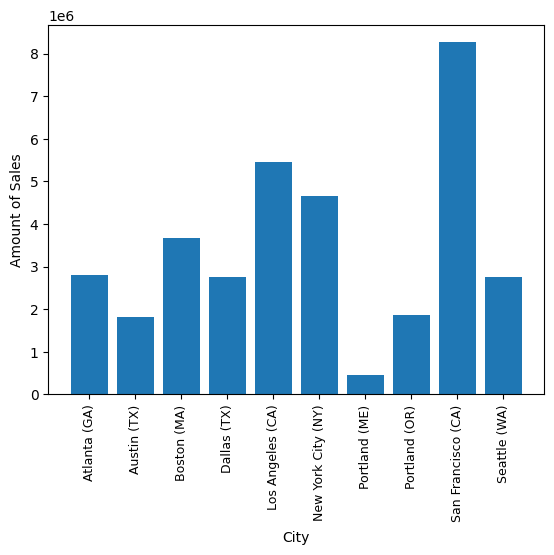

In [ ]:
import matplotlib.pyplot as pylot

# cities = all_data["City"].unique()
cities = [city for city, df in all_data.groupby('City')]

pylot.bar(cities, results["Sales"])
pylot.xticks(cities, rotation='vertical', size=9)
pylot.ylabel("Amount of Sales")
pylot.xlabel("City")
pylot.show()

##### Best Time To Advertisements 
###### Create Hour / Minutes / Seconds

In [ ]:
all_data["Order Date"] = pandas.to_datetime(all_data["Order Date"])
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minutes"] = all_data["Order Date"].dt.minute
all_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_7520\3331035058.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Order Date"] = pandas.to_datetime(all_data["Order Date"])
C:\Users\User\AppData\Local\Temp\ipykernel_7520\3331035058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Order Date"] = pandas.to_datetime(all_data["Order Date"])
C:\Users\User\AppData\Local\Temp\ipykernel_7520\3331035058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9,27


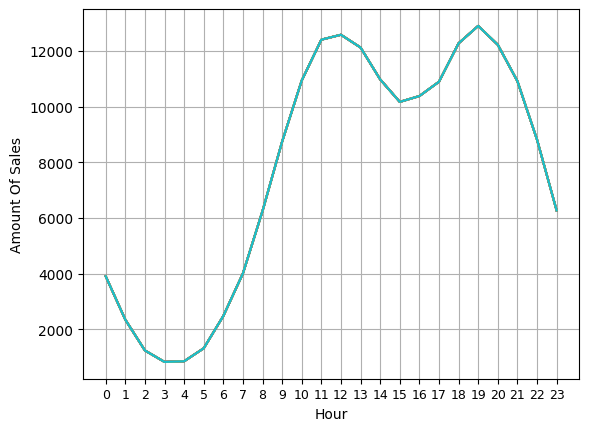

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Order ID,3910,2350,1243,831,854,1321,2482,4011,6256,8748,...,10984,10175,10384,10899,12280,12905,12228,10921,8822,6275
Product,3910,2350,1243,831,854,1321,2482,4011,6256,8748,...,10984,10175,10384,10899,12280,12905,12228,10921,8822,6275
Quantity Ordered,3910,2350,1243,831,854,1321,2482,4011,6256,8748,...,10984,10175,10384,10899,12280,12905,12228,10921,8822,6275
Price Each,3910,2350,1243,831,854,1321,2482,4011,6256,8748,...,10984,10175,10384,10899,12280,12905,12228,10921,8822,6275
Order Date,3910,2350,1243,831,854,1321,2482,4011,6256,8748,...,10984,10175,10384,10899,12280,12905,12228,10921,8822,6275
Purchase Address,3910,2350,1243,831,854,1321,2482,4011,6256,8748,...,10984,10175,10384,10899,12280,12905,12228,10921,8822,6275
Month,3910,2350,1243,831,854,1321,2482,4011,6256,8748,...,10984,10175,10384,10899,12280,12905,12228,10921,8822,6275
Sales,3910,2350,1243,831,854,1321,2482,4011,6256,8748,...,10984,10175,10384,10899,12280,12905,12228,10921,8822,6275
City,3910,2350,1243,831,854,1321,2482,4011,6256,8748,...,10984,10175,10384,10899,12280,12905,12228,10921,8822,6275
Minutes,3910,2350,1243,831,854,1321,2482,4011,6256,8748,...,10984,10175,10384,10899,12280,12905,12228,10921,8822,6275


In [ ]:
hours = [hour for hour, df in all_data.groupby("Hour")]

pylot.plot(hours, all_data.groupby(["Hour"]).count())
pylot.xticks(hours, rotation='horizontal', size=9)
pylot.xlabel("Hour")
pylot.ylabel("Amount Of Sales")
pylot.grid()
pylot.show()

all_data.groupby(["Hour"]).count().transpose()

# Best Time is around (11) 11am to (20) 8pm

#### Product most often sold together

In [ ]:
df = all_data[all_data["Order ID"].duplicated(keep=False)] # sort the same Order ID row
# df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
# df.head()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston (MA),11,31
...,...,...,...,...,...,...,...,...,...,...,...
185893,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,3.84,Atlanta (GA),20,18
185904,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,11.99,Atlanta (GA),0,25
185905,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,5.98,Atlanta (GA),0,25
185941,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,600.00,San Francisco (CA),13,49


In [ ]:
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10): # get 10 most amount of product
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### Product Sold The Most & The Reason About It

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour,Minutes,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,8,46,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,22,30,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,14,38,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,14,38,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,9,27,Los Angeles (CA)


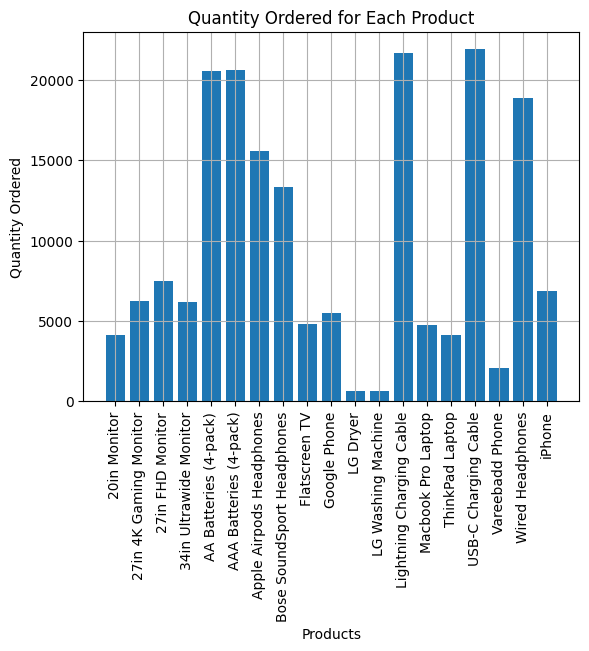

In [ ]:
import matplotlib.pyplot as pylot

product = all_data.groupby("Product")
quantity_ordered = product.count()["Quantity Ordered"]

products = [product for product, df in all_data.groupby('Product')]

pylot.bar(products, quantity_ordered)
pylot.xlabel('Products')
pylot.ylabel('Quantity Ordered')
pylot.title('Quantity Ordered for Each Product')
pylot.xticks(rotation='vertical')
pylot.grid()
pylot.show()

In [ ]:
prices = all_data.groupby('Product')["Price Each"].mean()
# prices

fig, ax1 = pylot.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color="g")
ax2.plot(products, prices, 'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color="g")
ax2.set_ylabel("Price ($) ", color="b")
ax1.set_xticklabels(products, rotation="vertical", size=8)
pylot.show()

NameError: name 'all_data' is not defined

In [10]:
all_data[all_data["Order ID"].duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001"
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
33,176586,Google Phone,1,600,04/10/19 17:00,"365 Center St, San Francisco, CA 94016"
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001"
...,...,...,...,...,...,...
186785,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301"
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186826,NaN,NaN,NaN,NaN,NaN,NaN
